In [28]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import make_regression

# Data Preparation

In [29]:
mean_01 = np.array([1, 0.5])
cov_01 = np.array([[1, 0.1], [0.1, 1]])

mean_02 = np.array([4, 5])
cov_02 = np.array([[1, 0.1], [0.1, 1]])

# print mean_01
# print cov_01

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)
print(dist_01.shape, dist_02.shape)

(500, 2) (500, 2)


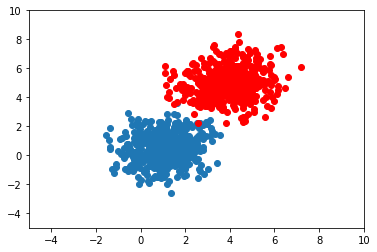

In [30]:
plt.figure(0)
plt.xlim(-5, 10)
plt.ylim(-5, 10)

plt.scatter(dist_01[:, 0], dist_01[:, 1])
plt.scatter(dist_02[:, 0], dist_02[:, 1], color='red')
plt.show()

In [31]:
r = dist_01.shape[0] + dist_02.shape[0]
c = dist_01.shape[1] + 1
data = np.zeros((r, c))
print(data.shape)

data[:dist_01.shape[0], :2] = dist_01
data[dist_01.shape[0]:, :2] = dist_02
data[dist_01.shape[0]:, -1] = 1.0

print(data.mean(axis=0))

(1000, 3)
[2.49808855 2.74289946 0.5       ]


In [32]:
np.random.shuffle(data)
print(data[:10])

[[ 3.55535886  4.07341329  1.        ]
 [ 0.19802912 -0.25658193  0.        ]
 [ 2.47937263  1.07384356  0.        ]
 [ 4.60312393  3.28867763  1.        ]
 [ 0.0526562   0.80425686  0.        ]
 [ 3.70511752  4.48319301  1.        ]
 [ 0.62692439  0.30333459  0.        ]
 [ 3.11450581  1.35324692  0.        ]
 [ 0.55738731 -1.5558226   0.        ]
 [ 4.8722101   5.00697489  1.        ]]


In [33]:
split = int(0.8 * data.shape[0])

X_train = data[:split, :-1]
X_test = data[split:, :-1]

y_train = data[:split, -1]
y_test = data[split:, -1]

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


# Logistic Regression functions

In [34]:
# hypothesis function
def hypothesis(x, w, b):
    '''
    function accepts input vector x, weight vector w,
    and bias (intercept) b.
    '''
    h = (x*w).sum() + b
    return sigmoid(h)

# sigmoid function
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-1.0 * z))

# error compute
def get_error(y_true, x, w, b):
    err = 0.0
    
    # Get number of examples
    m = x.shape[0]
    for ix in range(m):
        # for each example compute the binary cross-entropy
        if y_true[ix] == 1:
            err += -1.0*np.log2(hypothesis(x[ix], w, b))
        else:
            err += -1.0*np.log2(1.0 - hypothesis(x[ix], w, b))
    # get mean error
    err = err / m
    return err

# error gradient
def get_grads(y_true, x, w, b):
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    
    # Get number of examples
    m = x.shape[0]
    
    for ix in range(m):
        # for each example compute the gradients
        grad_w += (y_true[ix] - hypothesis(x[ix], w, b))*(x[ix])*-1
        grad_b += (y_true[ix] - hypothesis(x[ix], w, b))*(-1)
    
    # Get mean grads
    grad_w = grad_w / m
    grad_b = grad_b / m
    return [grad_w, grad_b]

# update weights using grad. desc.
def grad_descent(x, y_true, w, b, learning_rate=0.1):
    error = get_error(y_true, x, w, b)
    [grad_w, grad_b] = get_grads(y_true, x, w, b)
    
    w = w - learning_rate*grad_w
    b = b - learning_rate*grad_b
    
    return error, w, b

def predict(x, w, b):
    prob = hypothesis(x, w, b)
    
    if prob < 0.5:
        return 0
    else:
        return 1

def get_acc(x_tst, y_tst, w, B):
    y_pred = []
    for ix in range(y_tst.shape[0]):
        y_pred.append(predict(x_tst[ix], w, B))
    y_pred = np.asarray(y_pred)
    return float((y_pred==y_tst).sum())/y_tst.shape[0]

In [36]:
loss = []
acc = []
W = np.random.random((X_train.shape[1],))
b = np.random.random()

print(W)
print(b)

[0.58250026 0.22364238]
0.22962452874782613


In [37]:
for ix in range(100):
    l, W, b = grad_descent(X_train, y_train, W, b, learning_rate=0.5)
    acc.append(get_acc(X_test, y_test, W, b))
    loss.append(l)

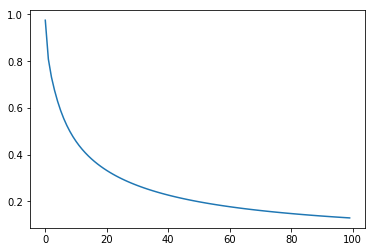

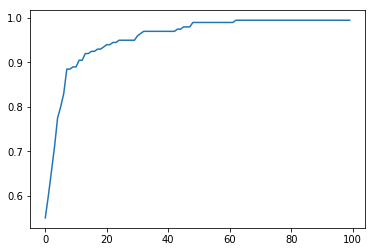

In [38]:
plt.figure(0)
plt.plot(loss)

plt.figure(1)
plt.plot(acc)